In [1]:
import pandas as pd

# Block 1: Dataset loading
df = pd.read_csv("Phishing_Human_Error_Dataset.csv")
df.head()


,Email_ID,Sender_Domain_Reputation,Email_Subject_Type,URL_Legitimacy_Score,Attachment_Type,Email_Presentation,User_ID,Stress_Level,Curiosity_Index,Urgency_Trigger,Prior_Training,Email_Opened,Link_Clicked,Attachment_Downloaded,Reported_Phishing,Time_to_React
0,1,0.374540,Curiosity,0.519082,none,Poorly_Formed,145,0.757777,0.265047,1,0,0,1,0,0,NaN
1,2,0.950714,Fear,0.479182,none,Well_Formed,28,0.281918,0.672060,0,1,0,0,0,1,NaN
2,3,0.731994,Reward,0.025642,.pdf,Well_Formed,169,0.318040,0.052024,1,0,0,0,0,0,NaN
3,4,0.598658,Fear,0.341248,none,Poorly_Formed,194,0.924642,0.113646,0,1,0,0,0,0,NaN
4,5,0.156019,Fear,0.380196,.zip,Well_Formed,25,0.056224,0.003918,0,0,0,0,0,0,NaN


In [2]:
pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sklearn


In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [6]:
# Load dataset
df = pd.read_csv("Phishing_Human_Error_Dataset.csv")

# Display the first few rows
print(df.head())


   Email_ID  Sender_Domain_Reputation Email_Subject_Type  \
0         1                  0.374540          Curiosity   
1         2                  0.950714               Fear   
2         3                  0.731994             Reward   
3         4                  0.598658               Fear   
4         5                  0.156019               Fear   

   URL_Legitimacy_Score Attachment_Type Email_Presentation  User_ID  \
0              0.519082            none      Poorly_Formed      145   
1              0.479182            none        Well_Formed       28   
2              0.025642            .pdf        Well_Formed      169   
3              0.341248            none      Poorly_Formed      194   
4              0.380196            .zip        Well_Formed       25   

   Stress_Level  Curiosity_Index  Urgency_Trigger  Prior_Training  \
0      0.757777         0.265047                1               0   
1      0.281918         0.672060                0               1   
2    

In [7]:
# Convert categorical columns to numeric (e.g., one-hot encoding)
df = pd.get_dummies(df, columns=["Email_Subject_Type", "Attachment_Type", "Email_Presentation"], drop_first=True)

# Fill missing values in 'Time_to_React' with median
df["Time_to_React"] = df["Time_to_React"].fillna(df["Time_to_React"].median())

# Normalize numerical features if needed (optional)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ["Sender_Domain_Reputation", "URL_Legitimacy_Score", "Stress_Level", "Curiosity_Index", "Time_to_React"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


TRAINING PART

In [8]:
# Define features and target
X = df.drop(columns=["Email_ID", "User_ID", "Link_Clicked"])  # Drop non-predictive columns
y = df["Link_Clicked"]  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (800, 16)
Test set size: (200, 16)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of each tree (default is no limit)
    min_samples_split=2,  # Minimum samples required to split a node
    min_samples_leaf=1,   # Minimum samples required in a leaf node
    random_state=42       # Ensures reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Evaluate training accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 100.00%


In [10]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate test accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 99.50%


In [11]:
import joblib

# Save the trained model
joblib.dump(model, "random_forest_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       189
           1       1.00      0.91      0.95        11

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200



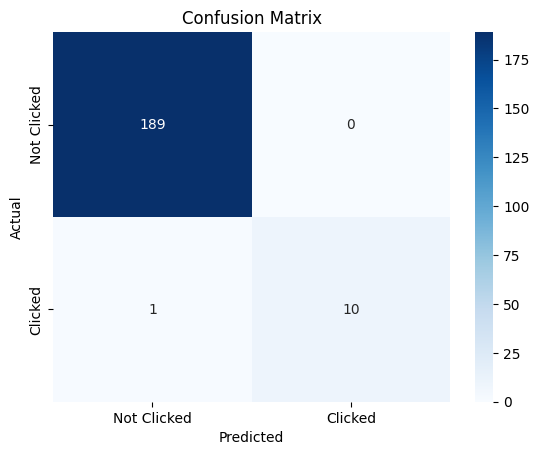

In [12]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Clicked", "Clicked"], yticklabels=["Not Clicked", "Clicked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


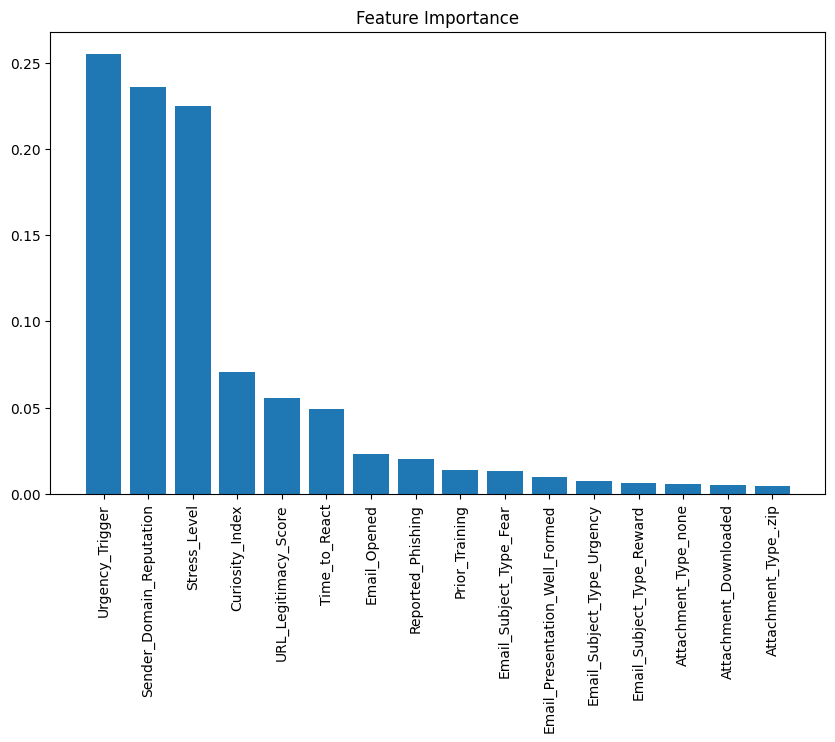

In [14]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Sort and visualize
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()


In [23]:
import pandas as pd

# Example feature columns obtained from training
feature_columns = [
    "Sender_Domain_Reputation", "URL_Legitimacy_Score", "Stress_Level",
    "Curiosity_Index", "Urgency_Trigger", "Prior_Training", "Email_Subject_Type_Fear",
    "Email_Subject_Type_Reward", "Attachment_Type_.zip", "Attachment_Type_none",
    "Email_Presentation_Well_Formed", "Email_Opened", "Attachment_Downloaded", "Reported_Phishing"
]

# Collect user input (0-10 scale, normalize to 0-1 for most features)
user_data = {
    "Sender_Domain_Reputation": [float(input("Enter Sender Domain Reputation (0-10): ")) / 10],  # Scale to 0-1
    "URL_Legitimacy_Score": [float(input("Enter URL Legitimacy Score (0-10): ")) / 10],          # Scale to 0-1
    "Stress_Level": [float(input("Enter Stress Level (0-10): ")) / 10],                         # Scale to 0-1
    "Curiosity_Index": [float(input("Enter Curiosity Index (0-10): ")) / 10],                   # Scale to 0-1
    "Urgency_Trigger": [float(input("Enter Urgency Trigger (0 or 10): ")) / 10],                  # Scale to 0-1
    "Prior_Training": [float(input("Enter Prior Training (0 or 10): ")) / 10],
}
email_subject_type = input("Enter Email Subject Type (Fear/Reward/Curiosity): ").strip().lower()
user_data["Email_Subject_Type_Fear"] = [1 if email_subject_type == "fear" else 0]
user_data["Email_Subject_Type_Reward"] = [1 if email_subject_type == "reward" else 0]
user_data["Email_Subject_Type_Curiosity"] = [1 if email_subject_type == "curiosity" else 0]
attachment_type = input("Enter Attachment Type (.zip/none/.pdf): ").strip().lower()
user_data["Attachment_Type_.zip"] = [1 if attachment_type == ".zip" else 0]
user_data["Attachment_Type_none"] = [1 if attachment_type == "none" else 0]
user_data["Attachment_Type_.pdf"] = [1 if attachment_type == ".pdf" else 0]

user_data["Email_Presentation_Well_Formed"] = [1 if input("Is Email Well-Formed (yes/no): ").strip().lower() == "yes" else 0]

# Convert to DataFrame
user_input_df = pd.DataFrame(user_data)

# Adjusted weights normalized to sum approximately to 1
weights = {
    "Sender_Domain_Reputation": 0.3, # 1-10, 10 being a very bad reputation
    "URL_Legitimacy_Score": 0.3, # 1-10, 10 being a very bad reputation
    "Stress_Level": 0.3, # 1-10, 10 being a very high stress level
    "Curiosity_Index": 0.2, # 1-10, 10 being a very curious
    "Urgency_Trigger": 0.3, # 1-10, 10 being drawn to urgency
    "Prior_Training": -0.05, # 1-10, 10 being most training
    "Email_Subject_Type_Fear": 0.25, # 1-10, 10 being falling trap to fear more
    "Email_Subject_Type_Reward": 0.25, # 1-10, 10 being falling trap to fear more
    "Email_Subject_Type_Curiosity": 0.15, # 1-10, 10 being more curious
    "Attachment_Type_.zip": 0.25,
    "Attachment_Type_.pdf": 0.2,
    "Attachment_Type_none": 0.1,
    "Email_Presentation_Well_Formed": -0.05,
    "Email_Presentation_Poorly_Formed": 0.25
}

# Normalize weights to sum to 1
total_weight = sum(abs(w) for w in weights.values())
normalized_weights = {k: v / total_weight for k, v in weights.items()}

# Debug: Print normalized weights
print("Normalized Weights:", normalized_weights)

# Ensure all expected columns are present
for col in weights.keys():
    if col not in user_input_df.columns:
        user_input_df[col] = 0  # Fill missing columns with 0

# Debug: Print user input data after ensuring all features are present
print("User Input DataFrame:")
print(user_input_df)

# Calculate phishing risk score
risk_score = 0
for feature, weight in normalized_weights.items():
    risk_score += user_input_df[feature][0] * weight
    # Debug: Log contribution of each feature to risk score
    print(f"Feature: {feature}, Value: {user_input_df[feature][0]}, Weight: {weight}, Contribution: {user_input_df[feature][0] * weight}")

# Convert risk score to percentage (between 0 and 100)
risk_percentage = max(0, min(risk_score * 100, 100))

# Debug: Print intermediate risk score and final percentage
print("Intermediate Risk Score:", risk_score)
print(f"Risk Percentage (%): {risk_percentage:.2f}%")

# Ensure the input has the same columns as the training data
for col in feature_columns:
    if col not in user_input_df.columns:
        user_input_df[col] = 0  # Add missing columns with default value

# Reorder the columns to match the training data
user_input_df = user_input_df[feature_columns]

# Output the risk percentage
print(f"\nFinal Risk Percentage: {risk_percentage:.2f}%")


Normalized Weights: {'Sender_Domain_Reputation': 0.10169491525423728, 'URL_Legitimacy_Score': 0.10169491525423728, 'Stress_Level': 0.10169491525423728, 'Curiosity_Index': 0.06779661016949153, 'Urgency_Trigger': 0.10169491525423728, 'Prior_Training': -0.01694915254237288, 'Email_Subject_Type_Fear': 0.0847457627118644, 'Email_Subject_Type_Reward': 0.0847457627118644, 'Email_Subject_Type_Curiosity': 0.05084745762711864, 'Attachment_Type_.zip': 0.0847457627118644, 'Attachment_Type_.pdf': 0.06779661016949153, 'Attachment_Type_none': 0.03389830508474576, 'Email_Presentation_Well_Formed': -0.01694915254237288, 'Email_Presentation_Poorly_Formed': 0.0847457627118644}
User Input DataFrame:
   Sender_Domain_Reputation  URL_Legitimacy_Score  Stress_Level  \
0                       1.0                   1.0           1.0   

   Curiosity_Index  Urgency_Trigger  Prior_Training  Email_Subject_Type_Fear  \
0              1.0              1.0             0.1                        1   

   Email_Subjec

In [18]:
pip install flask pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
